## Seeing issues when calling `fetch` over the remote SDK

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
debug_0 = np.load("../data/120s_test/5ms_debug_True_frame_0.npy")
debug_1 = np.load("../data/120s_test/5ms_debug_True_frame_1.npy")
d0 = np.load("../data/120s_test/5ms_debug_False_frame_0.npy")
d1 = np.load("../data/120s_test/5ms_debug_False_frame_1.npy")

In [3]:
a = np.concatenate([debug_0, debug_1], axis=1)
b = np.concatenate([d0, d1], axis=1)

In [13]:
a.shape

(150, 300)

In [14]:
a[0].shape

(300,)

In [11]:
np.mean(a, axis=0)[0]

-8.875

In [12]:
np.mean(b, axis=0)[0]

43.78125

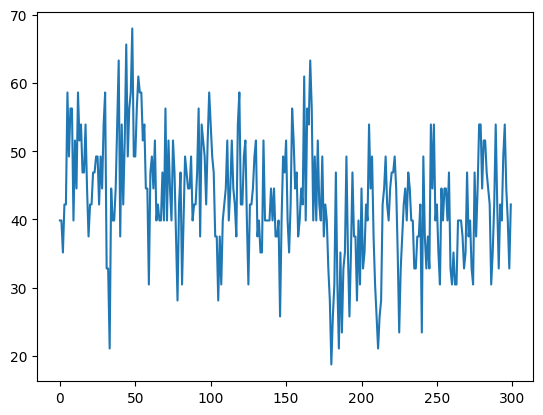

In [9]:
plt.plot(a[0])

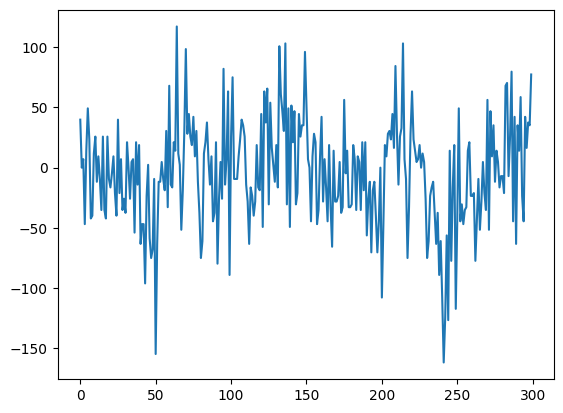

In [10]:
plt.plot(b[0])

In [15]:
i2v = np.load("../data/120s_test/i2v_multiplied.npy")

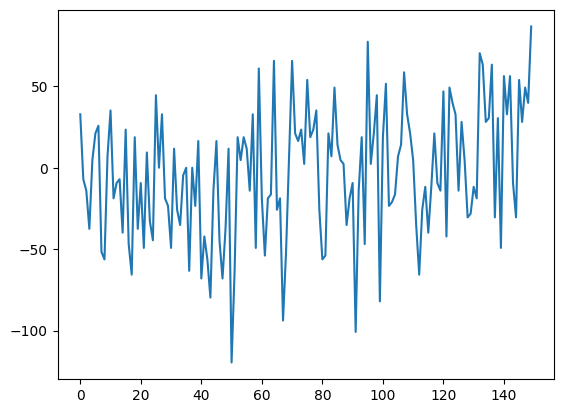

In [17]:
plt.plot(i2v[0])

In [18]:
i2v[0]

array([  32.8125 ,   -7.03125,  -14.0625 ,  -37.5    ,    4.6875 ,
         21.09375,   25.78125,  -51.5625 ,  -56.25   ,    7.03125,
         35.15625,  -18.75   ,   -9.375  ,   -7.03125,  -39.84375,
         23.4375 ,  -46.875  ,  -65.625  ,   18.75   ,  -37.5    ,
         -9.375  ,  -49.21875,    9.375  ,  -32.8125 ,  -44.53125,
         44.53125,    0.     ,   32.8125 ,  -18.75   ,  -23.4375 ,
        -49.21875,   11.71875,  -25.78125,  -35.15625,   -4.6875 ,
          0.     ,  -63.28125,    0.     ,  -23.4375 ,   16.40625,
        -67.96875,  -42.1875 ,  -56.25   ,  -79.6875 ,  -14.0625 ,
         16.40625,  -44.53125,  -67.96875,  -37.5    ,   11.71875,
       -119.53125,  -63.28125,   18.75   ,    4.6875 ,   18.75   ,
         11.71875,  -14.0625 ,   32.8125 ,  -49.21875,   60.9375 ,
        -18.75   ,  -53.90625,  -18.75   ,  -16.40625,   65.625  ,
        -25.78125,  -18.75   ,  -93.75   ,  -51.5625 ,    7.03125,
         65.625  ,   21.09375,   16.40625,   23.4375 ,    2.34

In [21]:
d0[0]

array([  39.84375,    0.     ,    7.03125,  -46.875  ,   14.0625 ,
         49.21875,   23.4375 ,  -42.1875 ,  -39.84375,   11.71875,
         25.78125,  -11.71875,    9.375  ,   -9.375  ,  -35.15625,
         25.78125,  -35.15625,  -42.1875 ,   25.78125,   -9.375  ,
        -16.40625,   -4.6875 ,    9.375  ,  -21.09375,  -39.84375,
         39.84375,  -21.09375,    7.03125,  -35.15625,  -25.78125,
        -37.5    ,   21.09375,    0.     ,  -25.78125,    4.6875 ,
          7.03125,  -53.90625,   21.09375,  -14.0625 ,   18.75   ,
        -63.28125,  -46.875  ,  -46.875  ,  -96.09375,  -23.4375 ,
          2.34375,  -58.59375,  -75.     ,  -67.96875,   -9.375  ,
       -154.6875 ,  -63.28125,  -11.71875,  -11.71875,    4.6875 ,
         -9.375  ,  -18.75   ,   30.46875,  -32.8125 ,   67.96875,
        -14.0625 ,  -16.40625,   21.09375,   14.0625 ,  117.1875 ,
         11.71875,    2.34375,  -51.5625 ,  -18.75   ,   30.46875,
         98.4375 ,   28.125  ,   44.53125,   25.78125,   18.75